In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"patientdataV6.csv")

In [3]:
data.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,N,49,F,N,N,110
1,108,22,181,24,N,32,F,N,N,192
2,86,0,239,20,N,60,F,N,N,121
3,80,36,164,31,Y,45,F,Y,N,141
4,66,36,185,23,N,39,F,N,N,63


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AVGHEARTBEATSPERMIN  10800 non-null  int64 
 1   PALPITATIONSPERDAY   10800 non-null  int64 
 2   CHOLESTEROL          10800 non-null  int64 
 3   BMI                  10800 non-null  int64 
 4   HEARTFAILURE         10800 non-null  object
 5   AGE                  10800 non-null  int64 
 6   SEX                  10800 non-null  object
 7   FAMILYHISTORY        10800 non-null  object
 8   SMOKERLAST5YRS       10800 non-null  object
 9   EXERCISEMINPERWEEK   10800 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 843.9+ KB


In [5]:
data.isnull().sum()

AVGHEARTBEATSPERMIN    0
PALPITATIONSPERDAY     0
CHOLESTEROL            0
BMI                    0
HEARTFAILURE           0
AGE                    0
SEX                    0
FAMILYHISTORY          0
SMOKERLAST5YRS         0
EXERCISEMINPERWEEK     0
dtype: int64

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HEARTFAILURE', ylabel='count'>

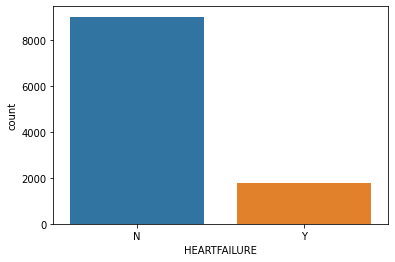

In [6]:
sns.countplot(data.HEARTFAILURE)

In [7]:
data.HEARTFAILURE.value_counts()

N    9012
Y    1788
Name: HEARTFAILURE, dtype: int64

In [8]:
data.columns

Index(['AVGHEARTBEATSPERMIN', 'PALPITATIONSPERDAY', 'CHOLESTEROL', 'BMI',
       'HEARTFAILURE', 'AGE', 'SEX', 'FAMILYHISTORY', 'SMOKERLAST5YRS',
       'EXERCISEMINPERWEEK'],
      dtype='object')

In [9]:
columns=['SEX', 'FAMILYHISTORY', 'SMOKERLAST5YRS']


In [10]:
list(enumerate(columns))

[(0, 'SEX'), (1, 'FAMILYHISTORY'), (2, 'SMOKERLAST5YRS')]

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


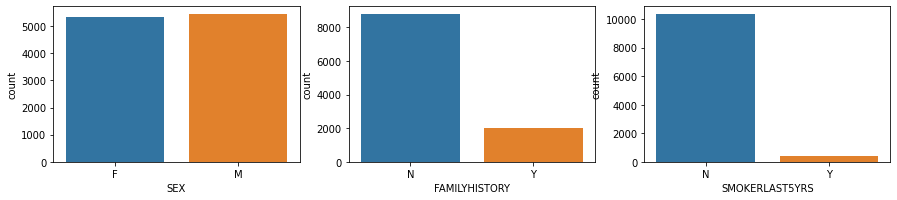

In [11]:
plt.figure(figsize=(15,20))
for i in enumerate(columns):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1],data=data)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.SEX=le.fit_transform(data.SEX)
data.FAMILYHISTORY=le.fit_transform(data.FAMILYHISTORY)
data.SMOKERLAST5YRS=le.fit_transform(data.SMOKERLAST5YRS)
data.HEARTFAILURE=le.fit_transform(data.HEARTFAILURE)

In [13]:
data.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,0,49,0,0,0,110
1,108,22,181,24,0,32,0,0,0,192
2,86,0,239,20,0,60,0,0,0,121
3,80,36,164,31,1,45,0,1,0,141
4,66,36,185,23,0,39,0,0,0,63


In [14]:
data[["SEX","HEARTFAILURE"]].groupby("SEX").mean()

,HEARTFAILURE
SEX,
0,0.168350
1,0.162816


In [15]:
for i in columns:
    print(i + "column")
    print(data[[i,"HEARTFAILURE"]].groupby(i).mean())
    print("*"*25)

SEXcolumn
     HEARTFAILURE
SEX              
0        0.168350
1        0.162816
*************************
FAMILYHISTORYcolumn
               HEARTFAILURE
FAMILYHISTORY              
0                  0.094995
1                  0.478130
*************************
SMOKERLAST5YRScolumn
                HEARTFAILURE
SMOKERLAST5YRS              
0                   0.159472
1                   0.315166
*************************


In [16]:
data.drop(["SEX"],axis=1,inplace=True)

In [17]:
data.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,0,49,0,0,110
1,108,22,181,24,0,32,0,0,192
2,86,0,239,20,0,60,0,0,121
3,80,36,164,31,1,45,1,0,141
4,66,36,185,23,0,39,0,0,63


In [18]:
data.HEARTFAILURE.value_counts()

0    9012
1    1788
Name: HEARTFAILURE, dtype: int64

In [19]:
yes=data[data.HEARTFAILURE==1]
no=data[data.HEARTFAILURE==0]

In [20]:
yes

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
3,80,36,164,31,1,45,1,0,141
11,134,7,228,34,1,63,1,0,92
30,104,39,234,23,1,45,0,0,31
37,62,14,207,28,1,40,0,0,161
43,63,10,210,33,1,53,0,0,145
...,...,...,...,...,...,...,...,...,...
10752,93,14,173,33,1,47,1,0,139
10777,72,34,195,28,1,44,1,0,87
10784,70,34,222,32,1,43,0,0,127
10789,93,25,202,23,1,58,1,0,54


In [21]:
oversampling=yes.sample(n=len(no),replace=True,random_state=0)

In [22]:
oversampling

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
3867,70,14,245,23,1,38,1,0,152
3132,142,45,206,26,1,59,0,0,176
9794,91,30,232,21,1,67,0,0,93
7892,108,19,154,29,1,49,1,0,56
5011,107,10,164,24,1,54,1,0,91
...,...,...,...,...,...,...,...,...,...
6173,130,15,169,30,1,64,1,0,134
7058,116,0,245,26,1,32,0,0,117
9726,69,15,166,27,1,47,0,0,173
3889,147,45,236,28,1,39,1,0,144


In [23]:
no

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,0,49,0,0,110
1,108,22,181,24,0,32,0,0,192
2,86,0,239,20,0,60,0,0,121
4,66,36,185,23,0,39,0,0,63
5,125,27,201,31,0,47,0,0,13
...,...,...,...,...,...,...,...,...,...
10795,122,27,203,30,0,31,0,0,246
10796,67,15,186,25,0,54,0,0,189
10797,103,6,211,20,0,40,0,0,205
10798,99,30,152,27,0,32,0,0,211


In [24]:
data=no.append(oversampling).reset_index(drop=True)

In [25]:
data.shape

(18024, 9)

In [26]:
data.HEARTFAILURE.value_counts()

0    9012
1    9012
Name: HEARTFAILURE, dtype: int64

In [58]:
data.columns

Index(['AVGHEARTBEATSPERMIN', 'PALPITATIONSPERDAY', 'CHOLESTEROL', 'BMI',
       'HEARTFAILURE', 'AGE', 'FAMILYHISTORY', 'SMOKERLAST5YRS',
       'EXERCISEMINPERWEEK'],
      dtype='object')

In [59]:
 x=data.iloc[:,[0,1,2,3,5,6,7,8]]
x.columns

Index(['AVGHEARTBEATSPERMIN', 'PALPITATIONSPERDAY', 'CHOLESTEROL', 'BMI',
       'AGE', 'FAMILYHISTORY', 'SMOKERLAST5YRS', 'EXERCISEMINPERWEEK'],
      dtype='object')

In [60]:
y=data.iloc[:,4:5].values

In [61]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [63]:
x

array([[ 0.10397743,  0.07717023, -1.22582525, ..., -0.69083715,
        -0.2406922 , -0.06153352],
       [ 0.79565937,  0.07717023, -0.54755276, ..., -0.69083715,
        -0.2406922 ,  1.13910254],
       [-0.21880748, -1.6780297 ,  1.63799195, ..., -0.69083715,
        -0.2406922 ,  0.09952741],
       ...,
       [-1.00271368, -0.48130248, -1.11277984, ..., -0.69083715,
        -0.2406922 ,  0.86090638],
       [ 2.59403242,  1.91215196,  1.52494653, ...,  1.44751915,
        -0.2406922 ,  0.43629118],
       [ 0.88788363, -0.64086611, -0.96205262, ..., -0.69083715,
        -0.2406922 ,  0.67056163]])

In [64]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(14419, 8)
(3605, 8)
(14419, 1)
(3605, 1)


In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

<ipython-input-66-3872a98b0b86>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier()

In [67]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [68]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.9617198335644938

In [70]:
confusion_matrix(y_pred,y_test)

array([[1683,   14],
       [ 124, 1784]], dtype=int64)

In [71]:
data.tail()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
18019,130,15,169,30,1,64,1,0,134
18020,116,0,245,26,1,32,0,0,117
18021,69,15,166,27,1,47,0,0,173
18022,147,45,236,28,1,39,1,0,144
18023,110,13,170,24,1,56,0,0,160


In [72]:
rfc.predict([[93,22,163,25,49,0,0,110]])

array([1])

In [73]:
import pickle
pickle.dump(rfc,open("heart.pkl","wb"))